# 02. Neural Network classification with PyTorch

classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

# 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First five samples of:\n {X[:5]}")
print(f"First five samples of:\n {y[:5]}")

First five samples of:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of:
 [1 1 1 1 0]


In [ ]:
# Make a dataframe with pandas
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


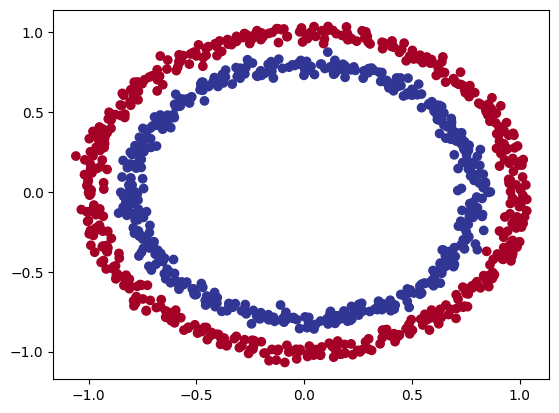

In [ ]:
# visualizing the above dataset
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

## 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and same for y: {y_sample}")
print(f"Shape of one sample of X: {X_sample.shape} and same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and same for y: 1
Shape of one sample of X: (2,) and same for y: ()


## 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch

torch.__version__

'2.0.1+cu118'

In [ ]:
# check X whether a tensor or numpy array

type(X)

numpy.ndarray

In [ ]:
# convert data into tensor

X = torch.from_numpy(X).type(torch.float) # we have to convert X into float32 to otherwise it will generate some type errors
y = torch.from_numpy(y).type(torch.float) # we have to convert y into float32 to otherwise it will generate some type errors

print(X[:5])
print(y[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])
tensor([1., 1., 1., 1., 0.])


In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# split data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 2. Building a model

Let's bild a model to classify our blue and red dots

To do so, we want to:

1. Setup deivce agnostic code so our code will run on an acceslerator (GPU).
2. Construct a model (by subclassing nn.Module).
3. Define a loss function and optimizer.
4. Create a training and test loop.

## 2.1 Setup deivce agnostic code so our code will run on an acceslerator (GPU).

In [ ]:
# import PyTorch and nn
import torch
from torch import nn

# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 2.2 Construct a model (by subclassing nn.Module).

1. Subclasses `nn.Module` (almost all models in PyTorch subclasses nn.Module)
2. Create 2 `nn.Linear` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (forward compuattion) of the model
4. Instantiate an instance of our model class and send it to the target device.

In [ ]:
# 1. construct a model that subclasses nn.Modul

class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # take 2 features and upscale into 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes 5 features from previous layer and ouput a single feature (same fearure as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = circleModelV0().to(device)
model_0

circleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Replicating the above model in a easy way

# Since we are not using
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1034,  0.0196],
                      [-0.0145,  0.3628],
                      [-0.1384, -0.6006],
                      [-0.0675,  0.3735],
                      [ 0.5117,  0.5703]], device='cuda:0')),
             ('0.bias',
              tensor([-0.3482, -0.3515, -0.3433,  0.0830,  0.0212], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0967, -0.3218,  0.2596, -0.2295, -0.0654]], device='cuda:0')),
             ('1.bias', tensor([-0.1473], device='cuda:0'))])

In [ ]:
# Make predictions with untrained model
with torch.inference_mode():
  untrainded_preds = model_0(X_test.to(device))

print(f"Length of predctions: {len(untrainded_preds)}, Shape: {untrainded_preds.shape}")
print(f"Length of test sample: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n {untrainded_preds[:10]}")
print(f"\nFirst 10 labels: \n {y_test[:10]}")

Length of predctions: 200, Shape: torch.Size([200, 1])
Length of test sample: 200, shape: torch.Size([200, 2])

First 10 predictions: 
 tensor([[-0.4315],
        [-0.5560],
        [-0.0259],
        [-0.5467],
        [ 0.0997],
        [ 0.0227],
        [-0.4275],
        [-0.2917],
        [-0.0318],
        [-0.5630]], device='cuda:0')

First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.3 Setup loss function and optimizer

For regression we have to use MAE or MSE.

For classification we have to use categorical cross entropy (cross entropy)

Loss function measures how wrong our model predictions are.

ADAM and SGD are the most common lost functions.

We are going to use `torch.nn.BCEWithLogitsLoss()`

In [ ]:
# setup loss function

# loss_fn = nn.BCELoss() requires inputs to have gone through the sigmoid activation function prior to input to BCELoss

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 2.3 Training a model

To train our model, we are going to build a training loop

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 2.3.1 Going from raw logits -> prediction probabilities -> prediction labels

`logits` are the raw output values without no activation function.



In [ ]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.4315],
        [-0.5560],
        [-0.0259],
        [-0.5467],
        [ 0.0997]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3938],
        [0.3645],
        [0.4935],
        [0.3666],
        [0.5249]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

- `y_pred_probs` >= 0.5 then `y=1` or it becomes `(class 1)`
- `y_pred_probs` < 0.5 `y=0` or it becomes `(class 0)`

In [ ]:
# find the prediction labels
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for the equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

### 2.3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the epochs
epochs = 100

# put data into the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. calculating loss and accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilites as inputs
  loss = loss_fn(y_logits, y_train) # Here we are using BCEwithLogitLoss, so no need to add sigmoid.
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} % | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f} %")

Epoch: 0 | Loss: 0.70687, Acc: 46.88 % | Test Loss: 0.69712, Test acc: 51.00 %
Epoch: 10 | Loss: 0.70244, Acc: 47.50 % | Test Loss: 0.69390, Test acc: 52.50 %
Epoch: 20 | Loss: 0.69983, Acc: 48.00 % | Test Loss: 0.69238, Test acc: 51.50 %
Epoch: 30 | Loss: 0.69817, Acc: 48.38 % | Test Loss: 0.69169, Test acc: 50.50 %
Epoch: 40 | Loss: 0.69704, Acc: 48.88 % | Test Loss: 0.69143, Test acc: 51.00 %
Epoch: 50 | Loss: 0.69623, Acc: 49.00 % | Test Loss: 0.69140, Test acc: 52.50 %
Epoch: 60 | Loss: 0.69562, Acc: 49.25 % | Test Loss: 0.69149, Test acc: 52.50 %
Epoch: 70 | Loss: 0.69516, Acc: 48.88 % | Test Loss: 0.69165, Test acc: 52.00 %
Epoch: 80 | Loss: 0.69480, Acc: 49.25 % | Test Loss: 0.69184, Test acc: 52.50 %
Epoch: 90 | Loss: 0.69451, Acc: 49.38 % | Test Loss: 0.69204, Test acc: 50.50 %


# 3. Make predictions and evaluate the model

From the metrics it looks like our model is not learning anything.

So to inspect it let's make some predictions and make them visual.

For visulaizing, we are going to download helper function from a git repositiory.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn pyTorch repo (if it's not alrady download)
if Path("helper_functions.py").is_file():
  print("helper_functions is already available, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


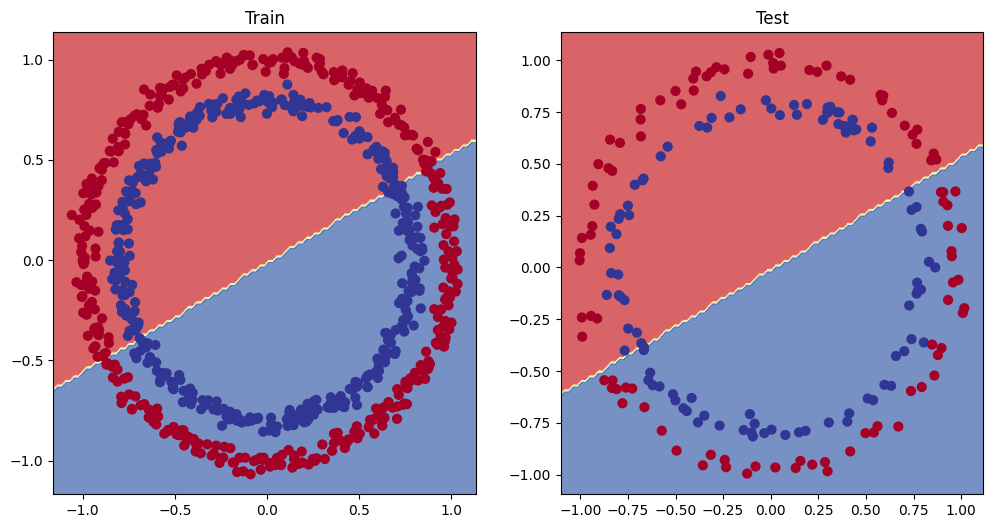

In [ ]:
# plot decision boundry of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 4. Improving a model (from a model perspective)

* add more layers - give model to more chances to learn about patterns in data
* add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from model's perspective because they deal directly with the model, rather than data.

And because these options are all values we can change, they are known as hyperparameters.

Let's try and improve our model by:
* Adding more hidden units. 5 -> 10
* Increase the number of layer 2 -> 3
* Increase number of epochs: 100 -> 1000

In [ ]:
class circleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes.


model_1 = circleModelV1().to(device)
model_1

circleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# create loss function
loss_fn = nn.BCEWithLogitsLoss()

# create optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

In [ ]:
# Writing train and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# train for longer
epochs = 1000

# put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> pred labels

  # 2. calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # 3. optimizer zerop grad()
  optimizer.zero_grad()

  # 4. loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    # 1. forward pass for test data
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. calcualte the loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)

  # print whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88%, Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38%, Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12%, Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62%, Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12%, Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00%, Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00%, Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00%, Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00%, Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00%, Test loss: 0.69468, Test acc: 46.00%


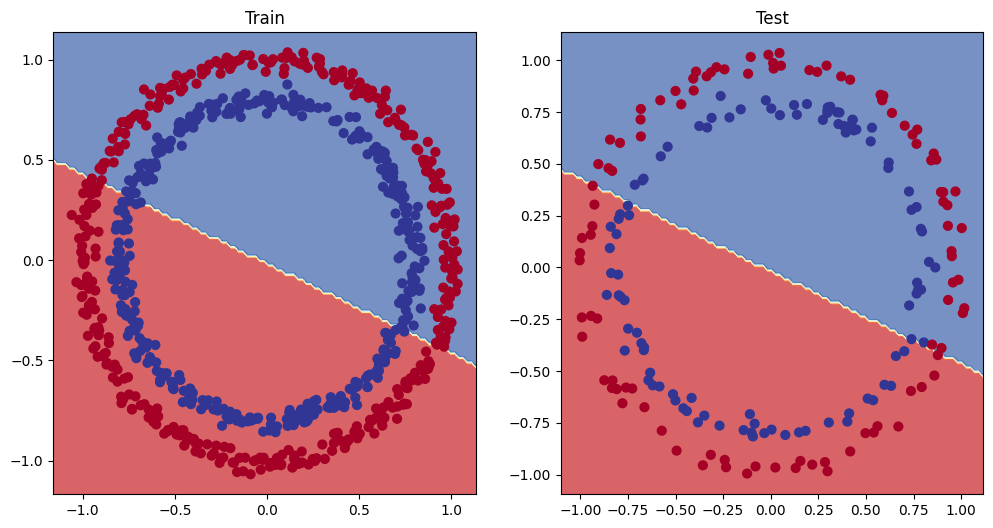

In [ ]:
# plot decision boundry of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# 5. The missing piece: non-linearity

we can drwa lot of patterns if we were given an infinite amount of a straight and non-straight lines

## 5.1 Recreating non-linear data (red and blue circles)

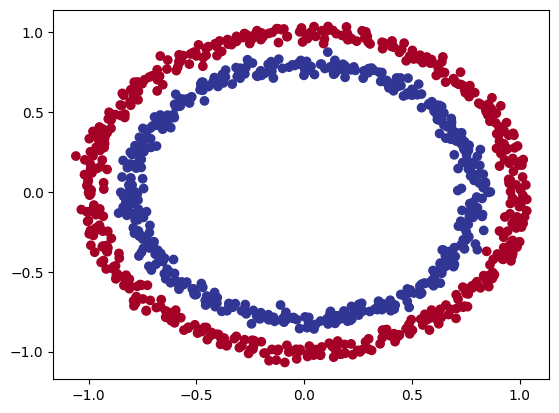

In [ ]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# convert data into tensors and split
import torch
from sklearn.model_selection import train_test_split

# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## 5.2 Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

In [ ]:
# build a model with non-linear activation functions
from torch import nn

class circleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = circleModelV2().to(device)
model_3

circleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

## 5.3 Training a model with non-linerity

In [ ]:
# random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# setup epochs
epochs = 10000

# train loop
for epoch in range(epochs):
  model_3.train()

  # 1. forward pass
  y_logits = model_3(X_train).squeeze() # logits are net inputs in the final dense layer (these values are coming before the final activation layer)
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2.calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)

  # print out status
  if epoch % 100 == 0:
    print(f"Epoch: (epoch) | Loss: {loss:.5f} Acc: {acc:.2f}| Test loss: {test_loss:.5f} Test acc: {test_acc:.5f} ")

Epoch: (epoch) | Loss: 0.69295 Acc: 50.00| Test loss: 0.69319 Test acc: 50.00000 
Epoch: (epoch) | Loss: 0.69115 Acc: 52.88| Test loss: 0.69102 Test acc: 52.50000 
Epoch: (epoch) | Loss: 0.68977 Acc: 53.37| Test loss: 0.68940 Test acc: 55.00000 
Epoch: (epoch) | Loss: 0.68795 Acc: 53.00| Test loss: 0.68723 Test acc: 56.00000 
Epoch: (epoch) | Loss: 0.68517 Acc: 52.75| Test loss: 0.68411 Test acc: 56.50000 
Epoch: (epoch) | Loss: 0.68102 Acc: 52.75| Test loss: 0.67941 Test acc: 56.50000 
Epoch: (epoch) | Loss: 0.67515 Acc: 54.50| Test loss: 0.67285 Test acc: 56.00000 
Epoch: (epoch) | Loss: 0.66659 Acc: 58.38| Test loss: 0.66322 Test acc: 59.00000 
Epoch: (epoch) | Loss: 0.65160 Acc: 64.00| Test loss: 0.64757 Test acc: 67.50000 
Epoch: (epoch) | Loss: 0.62362 Acc: 74.00| Test loss: 0.62145 Test acc: 79.00000 
Epoch: (epoch) | Loss: 0.56818 Acc: 87.75| Test loss: 0.57378 Test acc: 86.50000 
Epoch: (epoch) | Loss: 0.48153 Acc: 93.50| Test loss: 0.49935 Test acc: 90.50000 
Epoch: (epoch) |

## 5.4 Evaluating a model trained with non-linar activation functions

In [ ]:
# make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test)))

y_pred[:10], y_test[:10]

(tensor([1., 1., 0., 0., 0., 0., 0., 0., 0., 1.], device='cuda:0',
        grad_fn=<SliceBackward0>),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

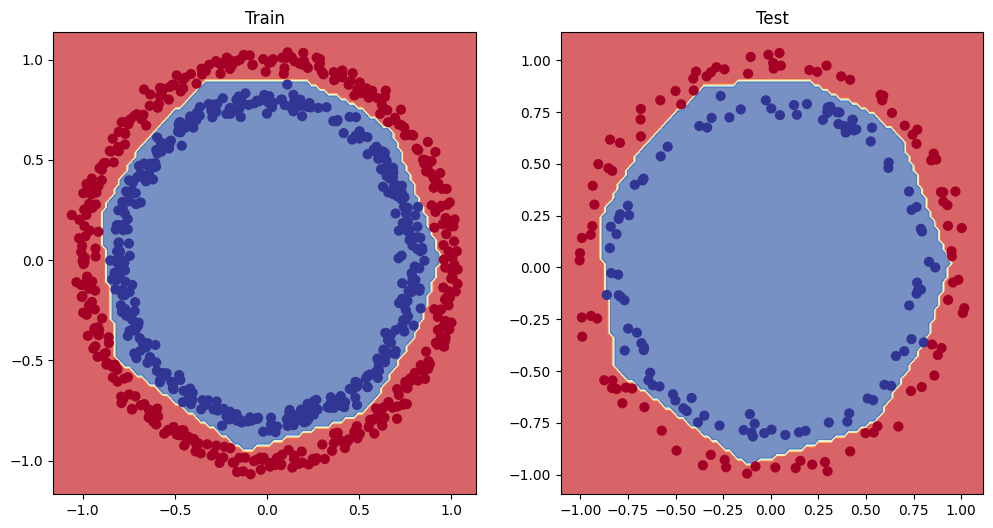

In [ ]:
# plot decision boundries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

# 6. Replicating non-linear activation functions

with the right tools, neural network can discover patterns in data.

In [ ]:
# create a tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

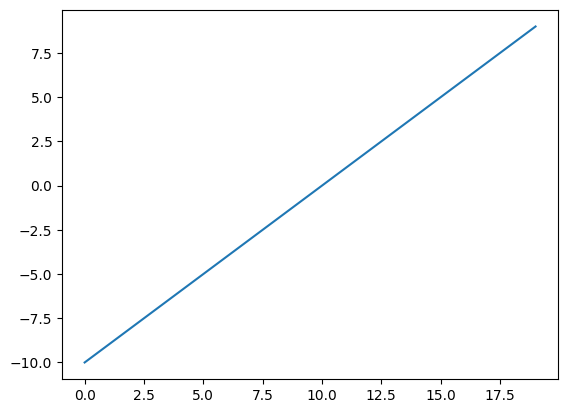

In [ ]:
# visualize the tensor
plt.plot(A)

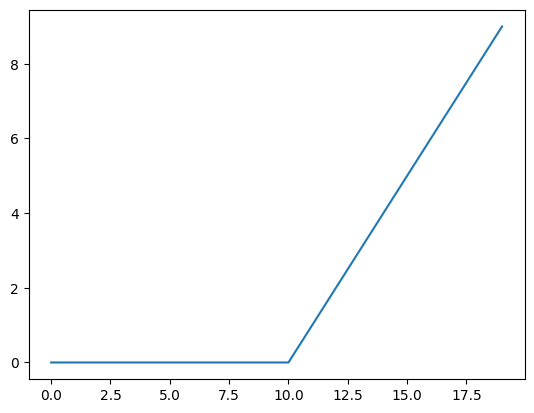

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

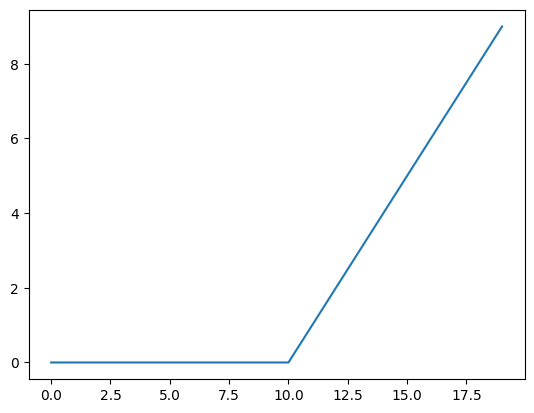

In [ ]:
# plot custom relu function
plt.plot(relu(A))

In [ ]:
# do same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

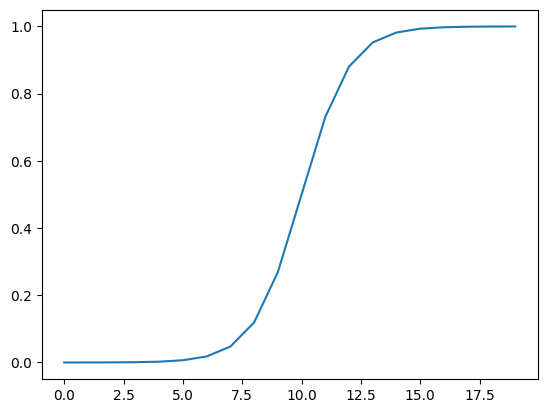

In [ ]:
plt.plot(torch.sigmoid(A))

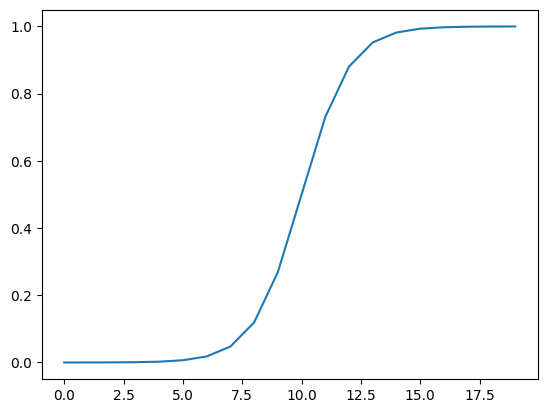

In [ ]:
# replicate custom sigmoid
plt.plot(sigmoid(A))

# 6. Putting all together with a multi-class classification problem

* Binary classification - one thing or another (cat vs dog, spam vs not spam)
* Multi-class classification - more than one thing or another (cat vs dog vs chicken)

## 6.1 Creating toy dataset class

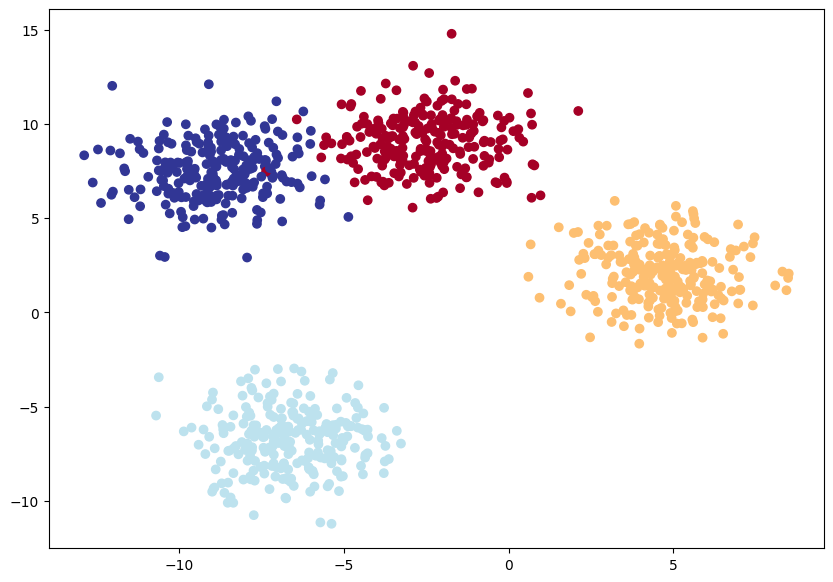

In [ ]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for the data
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)

# 4. plot data (visualy)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

## 6.2 Building a mulit-class classification model in PyTorch

In [ ]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# build a multiclass classification model
class BlobModel(nn.Module):
  """
  Initializing multiclass classification model

  Args:
    input_features (int): Number of input features to the model
    output_features (int): Number of output features (number of output classes)
    hidden_units (int): Number of hidden units between layers, default 8

  Returns:
    pass

  Example:
    pass
  """
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 6.3 Create a loss function and optimizer for a multi-class classification model

In [ ]:
# create a loss function
loss_fn = nn.CrossEntropyLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

## 6.4 Getting prediction probabilities from a multi-class pytorch model

In order to evaluate and train and test our models, we need to convert our model's outputs (logits) to predictions probabilities and then to labels.

In [ ]:
# get raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_train.to(device))

y_logits[:10]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923],
        [-0.2044, -1.1380, -0.9468, -0.3093],
        [-0.2613, -1.2852, -1.0251, -0.2935],
        [-0.5237, -0.5791, -1.1276, -0.8689],
        [-0.0423, -0.8228, -0.4666, -0.0986],
        [-0.1876, -1.1245, -0.8498, -0.2406]], device='cuda:0')

In [ ]:
# convert our models logit outputs to prediction probabilites
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]], device='cuda:0')
tensor([[0.3080, 0.3328, 0.1441, 0.2150],
        [0.3577, 0.1324, 0.1696, 0.3402],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3000, 0.1845, 0.2743, 0.2413],
        [0.3424, 0.1450, 0.1936, 0.3190]], device='cuda:0')


In [ ]:
# convert our models prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
        3, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

## 6.5 Creating a training loop and testing loop for multi-class PyTorch model

In [ ]:
# fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set epochs
epochs = 100

# put data on the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# loop thorugh data
for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### testing loop
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  # print the status
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}%")

Epoch: 0 | Loss: 1.1588, Acc: 40.375000% | Test loss: 1.0755, Test acc: 48.0000%
Epoch: 10 | Loss: 0.6448, Acc: 96.750000% | Test loss: 0.6607, Test acc: 97.5000%
Epoch: 20 | Loss: 0.4254, Acc: 98.500000% | Test loss: 0.4307, Test acc: 100.0000%
Epoch: 30 | Loss: 0.2529, Acc: 99.125000% | Test loss: 0.2451, Test acc: 99.5000%
Epoch: 40 | Loss: 0.1123, Acc: 99.250000% | Test loss: 0.1023, Test acc: 99.5000%
Epoch: 50 | Loss: 0.0663, Acc: 99.250000% | Test loss: 0.0585, Test acc: 99.5000%
Epoch: 60 | Loss: 0.0507, Acc: 99.250000% | Test loss: 0.0429, Test acc: 99.5000%
Epoch: 70 | Loss: 0.0430, Acc: 99.250000% | Test loss: 0.0349, Test acc: 99.5000%
Epoch: 80 | Loss: 0.0384, Acc: 99.250000% | Test loss: 0.0299, Test acc: 99.5000%
Epoch: 90 | Loss: 0.0352, Acc: 99.250000% | Test loss: 0.0266, Test acc: 99.5000%


## 6.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
# make predictions
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# view the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [ ]:
# go from logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [ ]:
# go from pred probs to pred labels
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

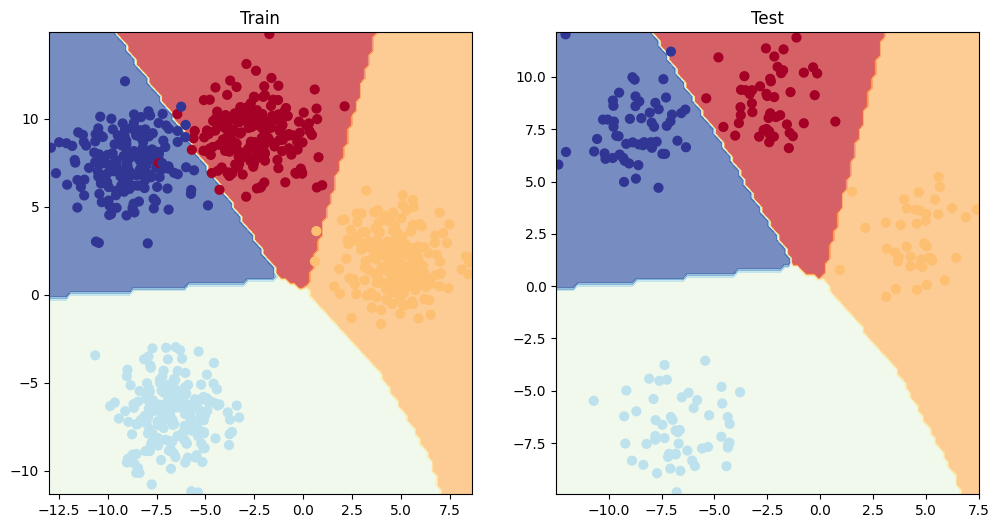

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

# 7. Few more classification techniques (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our models get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report


In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 7.4 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# setup metrics
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# calculate accuracy
torchmetrics_accuracy(y_pred, y_blob_test)

tensor(0.9950, device='cuda:0')